[[1.   0.56]
 [0.56 0.49]]


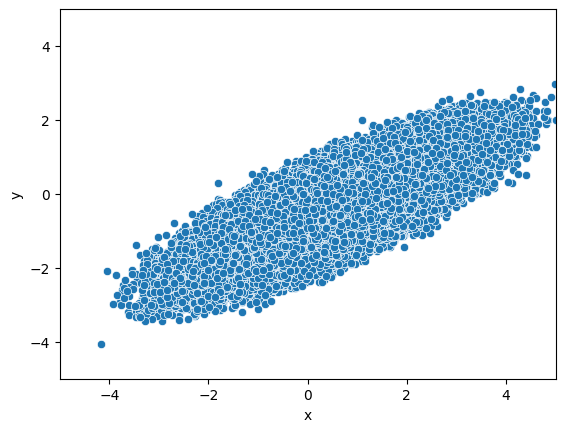

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Set the desired correlation
desired_correlation = 0.8

# Set the means and standard deviations for x and y
mean_x = 0.5
std_dev_x = 1
mean_y = -0.4
std_dev_y = 0.7

mean = np.array([mean_x, mean_y])

cov_matrix = np.array([[std_dev_x ** 2, desired_correlation * std_dev_x * std_dev_y],[std_dev_x * std_dev_y * desired_correlation, std_dev_y ** 2]])

print (cov_matrix)
# Generate a large number of random samples
n_samples = 1000000

# Generate random x values with a normal distribution
data = np.random.multivariate_normal(mean, cov_matrix, n_samples)

df = pd.DataFrame(data, columns=['x', 'y'])
sns.scatterplot(x="x", y="y", data=df)

# Set limits on the x-axis
plt.xlim(-5, 5)

# Set limits on the y-axis
plt.ylim(-5, 5)
plt.show()


[[ 0.97133797 -0.23770263]
 [ 0.23770263  0.97133797]]


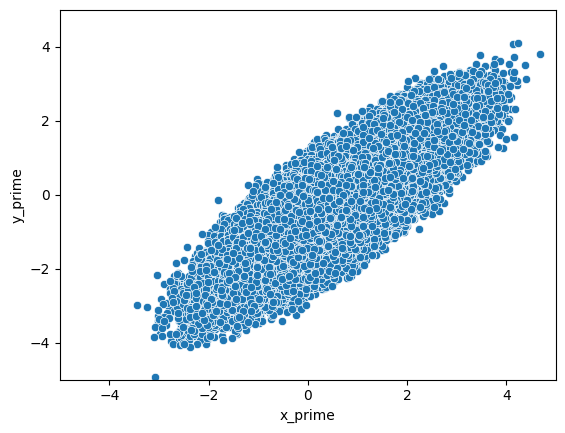

In [41]:
import math 

theta = 0.24

transform_matrix = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])

print (transform_matrix)

df["x_prime"] = transform_matrix[0][0] * df["x"] + transform_matrix[0][1] * df["y"]
df["y_prime"] = transform_matrix[1][0] * df["x"] + transform_matrix[1][1] * df["y"]

sns.scatterplot(x="x_prime", y="y_prime", data=df)

# Set limits on the x-axis
plt.xlim(-5, 5)

# Set limits on the y-axis
plt.ylim(-5, 5)

plt.show()

In [42]:
print (np.corrcoef(df["x"], df["y"]))
print (np.cov(df["x"], df["y"]))
print (np.corrcoef(df["x_prime"], df["y_prime"]))
print (np.cov(df["x_prime"], df["y_prime"]))

[[1.         0.80015888]
 [0.80015888 1.        ]]
[[0.99970853 0.56022763]
 [0.56022763 0.49034662]]
[[1.         0.82563637]
 [0.82563637 1.        ]]
[[0.71222684 0.61452542]
 [0.61452542 0.77782831]]


In [43]:
### Test if cov is R^T Cov R

cov_new = (transform_matrix.T @ cov_matrix) @ transform_matrix

cov_new_sample = np.array(np.cov(df["x_prime"], df["y_prime"]))

print ("covariance matrix \n (theory):\n", cov_new, "\n (sample):\n", cov_new_sample)

mean_new = mean @ transform_matrix

mean_new_sample = np.array([np.mean(df["x_prime"]), np.mean(df["y_prime"])])

print ("mean \n (theory): ", mean_new, "\n (sample):\n", mean_new_sample )


covariance matrix 
 (theory):
 [[1.22978004 0.37896347]
 [0.37896347 0.26021996]] 
 (sample):
 [[0.71222684 0.61452542]
 [0.61452542 0.77782831]]
mean 
 (theory):  [ 0.39058794 -0.5073865 ] 
 (sample):
 [ 0.58161631 -0.2692306 ]


[1.36032512 0.12967488] [[ 0.84095632 -0.54110301]
 [ 0.54110301  0.84095632]]


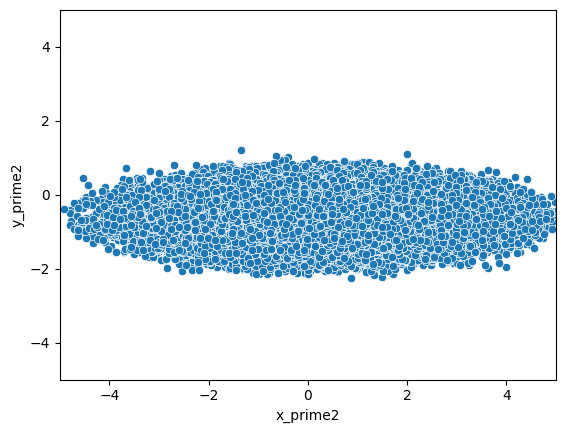

In [44]:
### Lets Try Play with PCA 
### The axis that maximised the variance the mode (1st principle component) is the eigenvector of the covariance matrix with the largest eigenvalue

eig_val, eig_vec = np.linalg.eig(cov_matrix)

print (eig_val, eig_vec)

transform_matrix = eig_vec.T

df["x_prime2"] = transform_matrix[0][0] * df["x"] + transform_matrix[0][1] * df["y"]
df["y_prime2"] = transform_matrix[1][0] * df["x"] + transform_matrix[1][1] * df["y"]

sns.scatterplot(x="x_prime2", y="y_prime2", data=df)
# Set limits on the x-axis
plt.xlim(-5, 5)

# Set limits on the y-axis
plt.ylim(-5, 5)

plt.show()


In [45]:
Sum_eig_val = np.sum(eig_val)

Sum_variance = np.sum(np.var(df[["x", "y"]], axis=0))

Sum_variance1 = np.sum(np.var(df[["x_prime", "y_prime"]], axis=0))

Sum_variance2 = np.sum(np.var(df[["x_prime2", "y_prime2"]], axis=0))

print (Sum_eig_val, Sum_variance, Sum_variance1, Sum_variance2)

1.4899999999999998 1.490053661054179 1.49005366105418 1.49005366105418
